In [19]:
import sys
import numpy as np
import pandas as pd
import glob
import yaml
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline

# Import my modules
sys.path.append('../modules') # Path to modules
from constants import ucsd_colors

In [2]:
path_to_data = '/cw3e/mead/projects/cwp140/scratch/dnash/data/'      # project data -- read only
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [3]:
fname_lst = glob.glob('../out/combined_df_*.csv')
print(fname_lst)
df_lst = []
df_lst2 = [] # whole dataset
for i, fname in enumerate(fname_lst):   
    df = pd.read_csv(fname)
    
    ## clean freezing level - set to nan where freezing level > 10000 m
    df.loc[(df.freezing_level > 10000), 'freezing_level'] = np.nan 
    
    ## clean ASOS_1hr - set to nan where ASOS_1hr > 200 mm per hour
    df.loc[(df.ASOS_1hr > 50), 'ASOS_1hr'] = np.nan
    df.loc[((df.ASOS_prec_accum > 600) | (df.ASOS_prec_accum < 0)), 'ASOS_prec_accum'] = np.nan 
    
    df_lst2.append(df)
    df = df.loc[df['impact_scale'] >= 0]
    
    df_lst.append(df)
    
result = pd.concat(df_lst)
list(df_lst2[0].columns)

['../out/combined_df_HONA2.csv', '../out/combined_df_PAYA.csv', '../out/combined_df_PAPG.csv', '../out/combined_df_PAHN.csv', '../out/combined_df_PAKW.csv', '../out/combined_df_COOPHCSA2.csv', '../out/combined_df_KTNA2.csv', '../out/combined_df_PAGY.csv', '../out/combined_df_PAJN.csv', '../out/combined_df_PAWG.csv', '../out/combined_df_PAGS.csv', '../out/combined_df_PASI.csv', '../out/combined_df_PAKT.csv']


['trackID',
 'Unnamed: 0',
 'trackID.1',
 'start_date',
 'end_date',
 'duration',
 'IVT_max',
 'IVT_max_time',
 'IVT_dir',
 'tIVT',
 'freezing_level',
 'ar_scale',
 'GFS_prec_accum',
 'GFS_prec_max_rate',
 'ASOS_prec_accum',
 'ASOS_1hr',
 'ASOS_3hr',
 'ASOS_6hr',
 'ASOS_12hr',
 'ASOS_24hr',
 'impact_scale',
 'impacts',
 'impact_notes',
 'impact_type',
 'misc']

,trackID,Unnamed: 0,trackID.1,start_date,end_date,duration,IVT_max,IVT_max_time,IVT_dir,tIVT,...,ASOS_1hr,ASOS_3hr,ASOS_6hr,ASOS_12hr,ASOS_24hr,impact_scale,impacts,impact_notes,impact_type,misc
44,2.000082e+11,44,2.000082e+11,2000-08-20 12:00:00,2000-08-22 18:00:00,54.0,637.616701,2000-08-22T00:00:00.000000000,3.841032,1.344635e+08,...,NaN,NaN,NaN,NaN,NaN,2.0,1,Flooding along POW along small creeks and logg...,Flooding,NaN
45,2.000082e+11,45,2.000082e+11,2000-08-22 18:00:00,2000-08-23 00:00:00,6.0,76.425419,2000-08-22T21:00:00.000000000,4.001108,1.398460e+08,...,NaN,NaN,NaN,NaN,NaN,2.0,1,Flooding along POW along small creeks and logg...,Flooding,NaN
135,2.001093e+11,135,2.001093e+11,2001-09-29 06:00:00,2001-09-29 12:00:00,6.0,470.644502,2001-09-29T12:00:00.000000000,2.428351,1.436077e+08,...,NaN,NaN,NaN,NaN,NaN,0.0,1,Staney creek was at 15th highest overflow,Action stage,This may be connected with a prior event but u...
136,2.001093e+11,136,2.001093e+11,2001-09-30 18:00:00,2001-10-05 18:00:00,42.0,214.549741,2001-10-04T00:00:00.000000000,5.676192,8.049736e+07,...,NaN,NaN,NaN,NaN,NaN,0.0,1,Staney creek was at 15th highest overflow,Action stage,This may be connected with a prior event but u...
226,2.002123e+11,226,2.002123e+11,2002-12-30 12:00:00,2003-01-05 00:00:00,36.0,645.585221,2003-01-04T15:00:00.000000000,2.621114,1.186790e+08,...,5.080,10.160,17.526,22.860,32.258,0.0,1,Staney creek was at 14th highest overflow,Action stage,17th highest precip amount for klawock
227,2.003011e+11,227,2.003011e+11,2003-01-05 06:00:00,2003-01-05 12:00:00,6.0,252.985063,2003-01-05T12:00:00.000000000,3.084221,1.452601e+08,...,4.064,9.906,18.288,26.670,26.670,0.0,1,Staney creek was at 14th highest overflow,Action stage,17th highest precip amount for klawock
228,2.003010e+11,228,2.003010e+11,2003-01-03 12:00:00,2003-01-07 00:00:00,36.0,778.969968,2003-01-05T21:00:00.000000000,3.128984,1.794259e+08,...,6.350,13.716,18.542,34.544,34.544,0.0,1,Staney creek was at 14th highest overflow,Action stage,17th highest precip amount for klawock
229,2.003010e+11,229,2.003010e+11,2003-01-02 18:00:00,2003-01-12 06:00:00,6.0,778.969968,2003-01-05T21:00:00.000000000,3.128984,9.248699e+07,...,6.350,13.716,18.542,34.544,34.544,0.0,1,Staney creek was at 14th highest overflow,Action stage,17th highest precip amount for klawock
354,2.004091e+11,354,2.004091e+11,2004-09-14 18:00:00,2004-09-24 18:00:00,48.0,777.753898,2004-09-21T09:00:00.000000000,3.760600,1.211347e+08,...,12.954,20.066,26.162,49.530,60.706,0.0,1,Staney creek was at 12th highest overflow,Action stage,This event had another high AR event a couple ...
697,2.009020e+11,697,2.009020e+11,2009-02-01 06:00:00,2009-02-03 12:00:00,6.0,413.649583,2009-02-03T12:00:00.000000000,3.454719,1.248010e+08,...,4.318,15.240,21.844,35.077,56.463,0.0,1,Staney creek was at 9th highest overflow,Action stage,NaN


In [39]:
## pulling out juneau for proof of concept
df = df_lst2[-4]
df

,trackID,Unnamed: 0,trackID.1,start_date,end_date,duration,IVT_max,IVT_max_time,IVT_dir,tIVT,...,ASOS_1hr,ASOS_3hr,ASOS_6hr,ASOS_12hr,ASOS_24hr,impact_scale,impacts,impact_notes,impact_type,misc
0,2.000011e+11,0,2.000011e+11,2000-01-06 00:00:00,2000-01-06 18:00:00,18.0,201.381885,2000-01-06T09:00:00.000000000,3.263969,2.624034e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2.000011e+11,1,2.000011e+11,2000-01-05 00:00:00,2000-01-08 06:00:00,6.0,201.381885,2000-01-06T09:00:00.000000000,3.263969,4.118380e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2.000012e+11,2,2.000012e+11,2000-01-19 06:00:00,2000-01-19 12:00:00,6.0,78.747701,2000-01-19T06:00:00.000000000,5.465259,8.873418e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,2.000012e+11,3,2.000012e+11,2000-01-24 06:00:00,2000-01-31 00:00:00,90.0,364.866438,2000-01-27T21:00:00.000000000,3.493391,6.140739e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,2.000013e+11,4,2.000013e+11,2000-01-28 12:00:00,2000-01-29 00:00:00,6.0,255.933969,2000-01-29T00:00:00.000000000,3.063482,3.951391e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2.019082e+11,1495,2.019082e+11,2019-08-16 00:00:00,2019-08-21 12:00:00,132.0,388.329990,2019-08-17T18:00:00.000000000,4.855809,3.964056e+07,...,7.112,56.896,77.978,91.744,96.620,NaN,0,NaN,NaN,NaN
1496,2.019082e+11,1496,2.019082e+11,2019-08-21 12:00:00,2019-08-22 06:00:00,18.0,147.298402,2019-08-22T00:00:00.000000000,4.707310,4.510097e+07,...,1.016,1.778,1.778,1.903,1.903,NaN,0,NaN,NaN,NaN
1497,2.019082e+11,1497,2.019082e+11,2019-08-22 12:00:00,2019-08-23 00:00:00,6.0,226.867528,2019-08-23T00:00:00.000000000,3.354940,4.947132e+07,...,3.302,29.489,58.953,82.575,82.575,NaN,0,NaN,NaN,NaN
1498,2.019082e+11,1498,2.019082e+11,2019-08-23 12:00:00,2019-08-24 06:00:00,18.0,258.364047,2019-08-23T21:00:00.000000000,3.102674,4.599178e+07,...,2.032,34.798,36.626,40.436,40.436,NaN,0,NaN,NaN,NaN


In [48]:
impacts = df_lst[4]
test = df_lst[4]
# test = impacts.groupby('impact_scale').first()
test

,trackID,Unnamed: 0,trackID.1,start_date,end_date,duration,IVT_max,IVT_max_time,IVT_dir,tIVT,...,ASOS_1hr,ASOS_3hr,ASOS_6hr,ASOS_12hr,ASOS_24hr,impact_scale,impacts,impact_notes,impact_type,misc
44,2.000082e+11,44,2.000082e+11,2000-08-20 12:00:00,2000-08-22 18:00:00,54.0,637.616701,2000-08-22T00:00:00.000000000,3.841032,1.344635e+08,...,NaN,NaN,NaN,NaN,NaN,2.0,1,Flooding along POW along small creeks and logg...,Flooding,NaN
45,2.000082e+11,45,2.000082e+11,2000-08-22 18:00:00,2000-08-23 00:00:00,6.0,76.425419,2000-08-22T21:00:00.000000000,4.001108,1.398460e+08,...,NaN,NaN,NaN,NaN,NaN,2.0,1,Flooding along POW along small creeks and logg...,Flooding,NaN
135,2.001093e+11,135,2.001093e+11,2001-09-29 06:00:00,2001-09-29 12:00:00,6.0,470.644502,2001-09-29T12:00:00.000000000,2.428351,1.436077e+08,...,NaN,NaN,NaN,NaN,NaN,0.0,1,Staney creek was at 15th highest overflow,Action stage,This may be connected with a prior event but u...
136,2.001093e+11,136,2.001093e+11,2001-09-30 18:00:00,2001-10-05 18:00:00,42.0,214.549741,2001-10-04T00:00:00.000000000,5.676192,8.049736e+07,...,NaN,NaN,NaN,NaN,NaN,0.0,1,Staney creek was at 15th highest overflow,Action stage,This may be connected with a prior event but u...
226,2.002123e+11,226,2.002123e+11,2002-12-30 12:00:00,2003-01-05 00:00:00,36.0,645.585221,2003-01-04T15:00:00.000000000,2.621114,1.186790e+08,...,5.080,10.160,17.526,22.860,32.258,0.0,1,Staney creek was at 14th highest overflow,Action stage,17th highest precip amount for klawock
227,2.003011e+11,227,2.003011e+11,2003-01-05 06:00:00,2003-01-05 12:00:00,6.0,252.985063,2003-01-05T12:00:00.000000000,3.084221,1.452601e+08,...,4.064,9.906,18.288,26.670,26.670,0.0,1,Staney creek was at 14th highest overflow,Action stage,17th highest precip amount for klawock
228,2.003010e+11,228,2.003010e+11,2003-01-03 12:00:00,2003-01-07 00:00:00,36.0,778.969968,2003-01-05T21:00:00.000000000,3.128984,1.794259e+08,...,6.350,13.716,18.542,34.544,34.544,0.0,1,Staney creek was at 14th highest overflow,Action stage,17th highest precip amount for klawock
229,2.003010e+11,229,2.003010e+11,2003-01-02 18:00:00,2003-01-12 06:00:00,6.0,778.969968,2003-01-05T21:00:00.000000000,3.128984,9.248699e+07,...,6.350,13.716,18.542,34.544,34.544,0.0,1,Staney creek was at 14th highest overflow,Action stage,17th highest precip amount for klawock
354,2.004091e+11,354,2.004091e+11,2004-09-14 18:00:00,2004-09-24 18:00:00,48.0,777.753898,2004-09-21T09:00:00.000000000,3.760600,1.211347e+08,...,12.954,20.066,26.162,49.530,60.706,0.0,1,Staney creek was at 12th highest overflow,Action stage,This event had another high AR event a couple ...
697,2.009020e+11,697,2.009020e+11,2009-02-01 06:00:00,2009-02-03 12:00:00,6.0,413.649583,2009-02-03T12:00:00.000000000,3.454719,1.248010e+08,...,4.318,15.240,21.844,35.077,56.463,0.0,1,Staney creek was at 9th highest overflow,Action stage,NaN


../figs/test_distribution.png


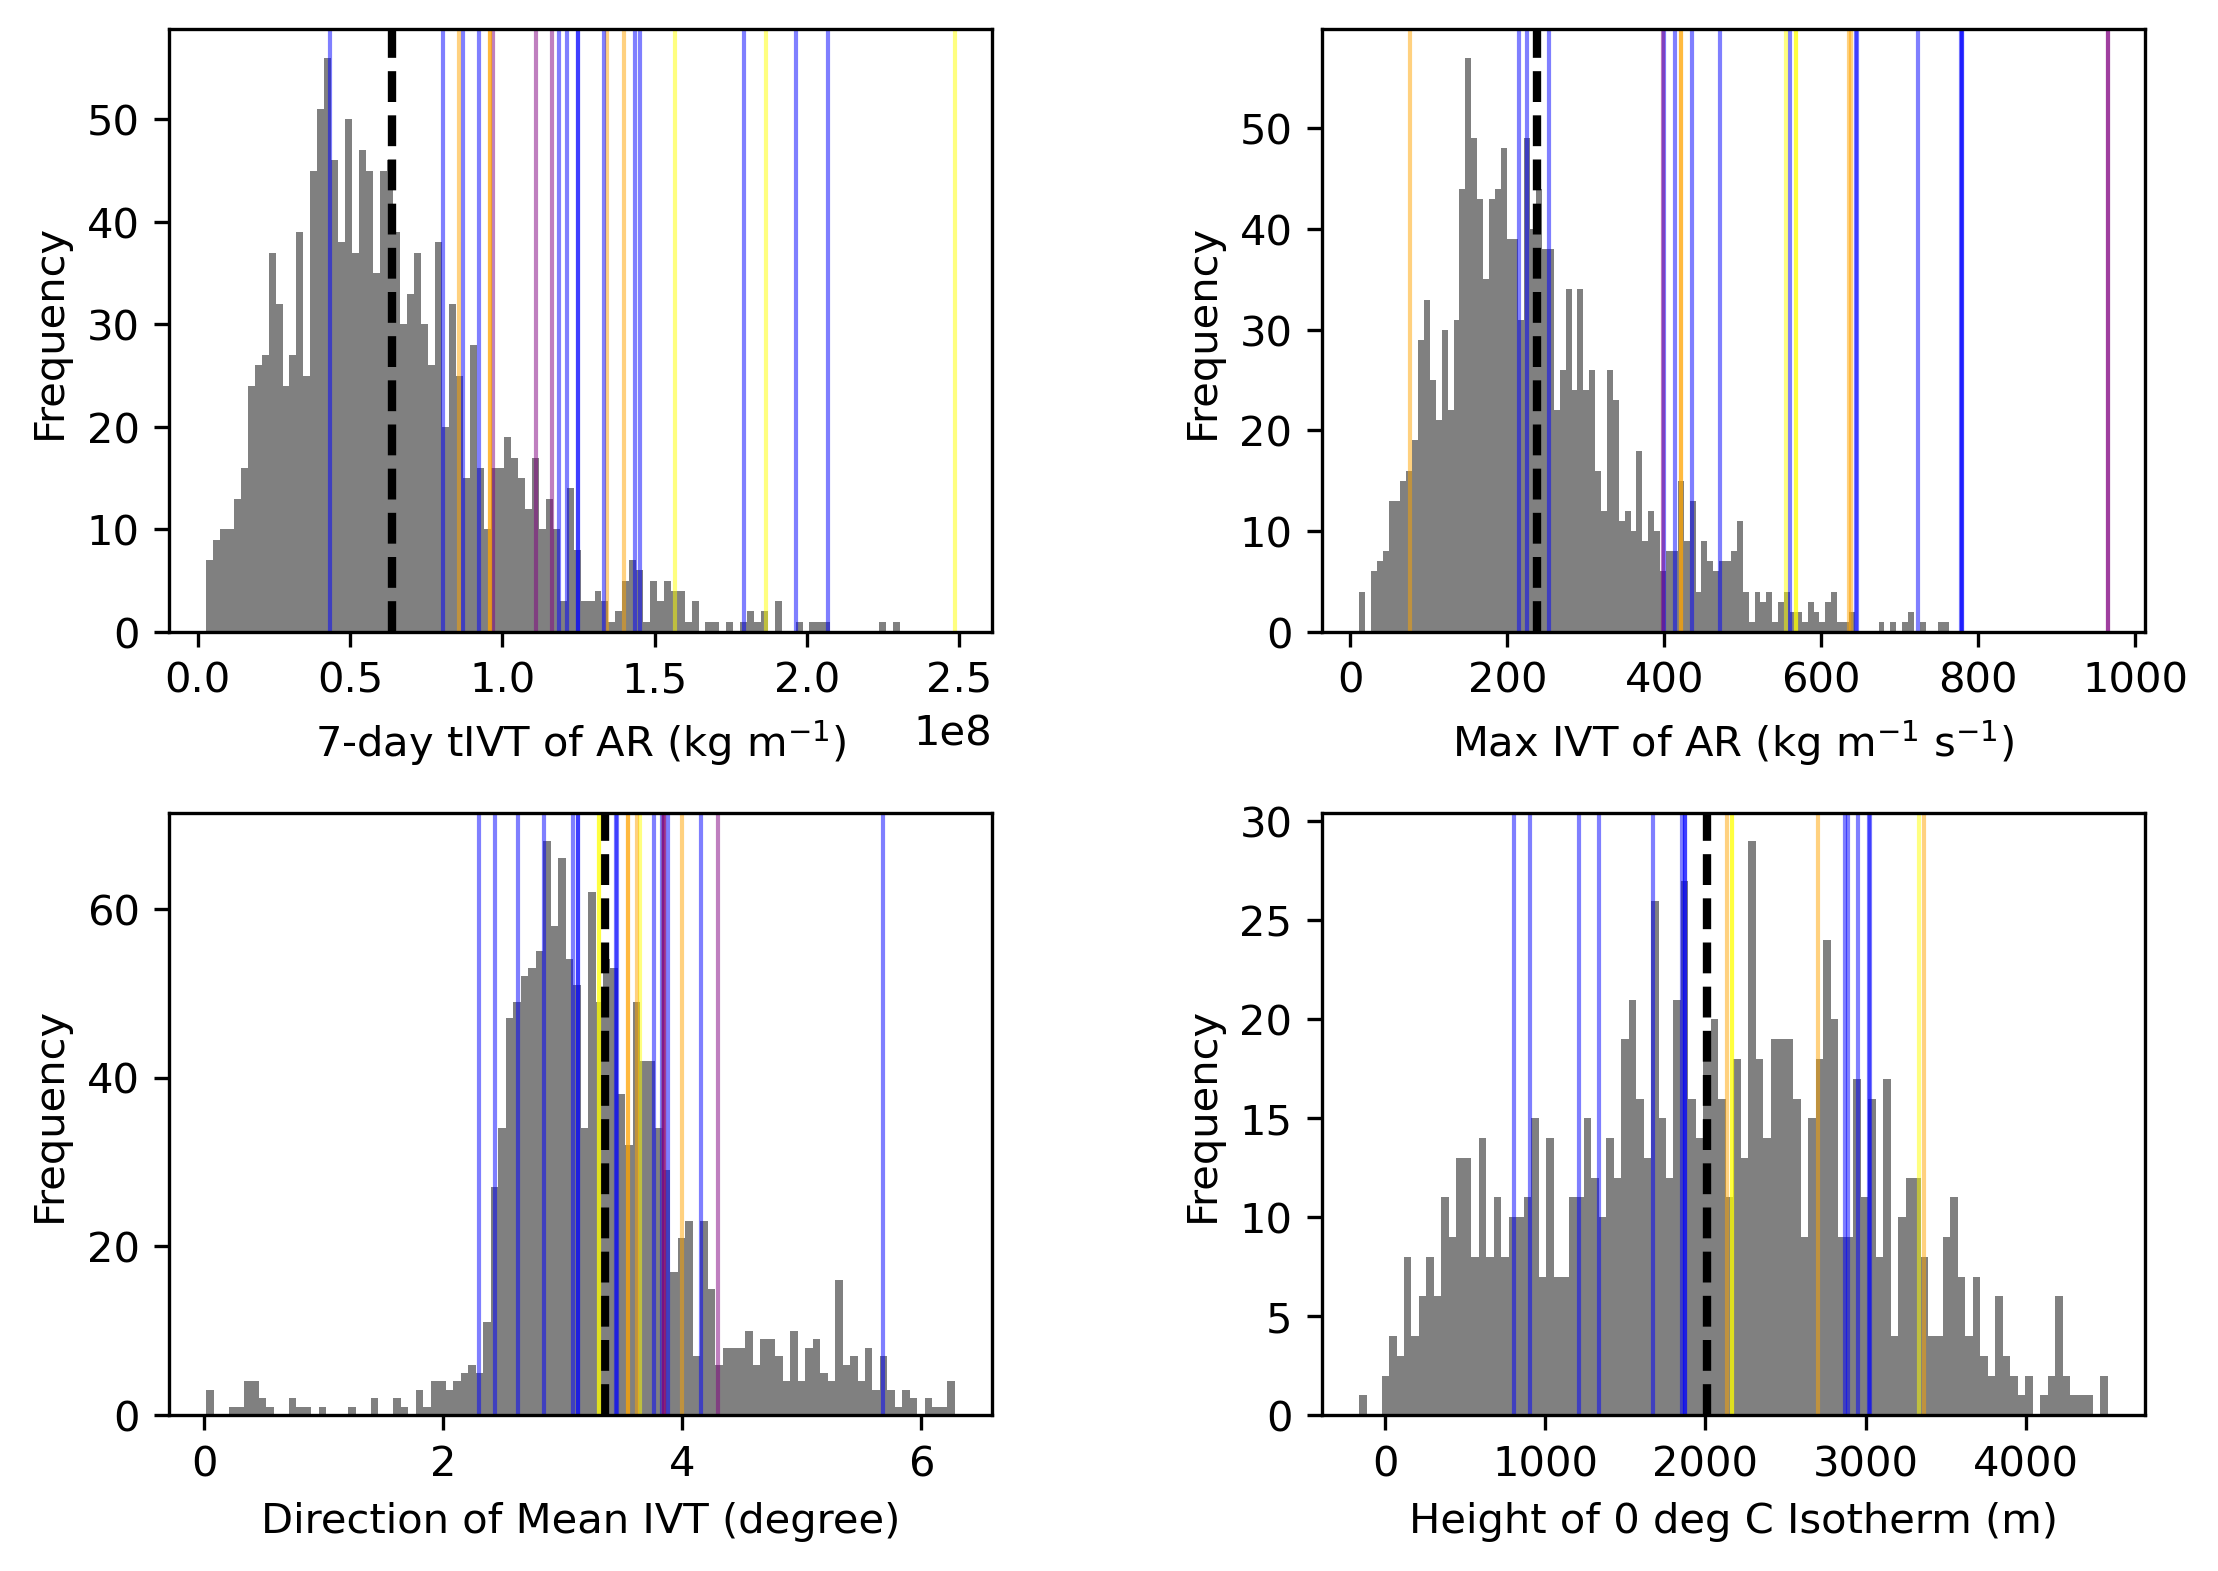

In [49]:
fig = plt.figure(1, figsize=(8.5, 6))
fig.dpi = 300
fname = '../figs/test_distribution'
fmt = 'png'

numrows = 2
numcols = 2
## Use gridspec to set up a plot with a series of subplots that is
## n-rows by n-columns
gs = GridSpec(numrows, numcols, hspace=0.3, wspace=0.4)
red = 'lightcoral'
blue = 'cadetblue'
############################
# tIVT Magnitude Histogram #
############################
ax1 = plt.subplot(gs[0, 0])
n_bins = 100
tivtmag = df['tIVT'].values
ax1.hist(tivtmag, bins=n_bins, facecolor='grey')
ax1.axvline(np.nanmean(tivtmag), color='k', linestyle='--', linewidth=2)
# ax1.hist(ivtmag_march, bins=n_bins, facecolor='grey')
# ax1.axvline(np.nanmean(ivtmag_march), color='grey', linestyle='--', linewidth=2)
color_lst = ['blue', 'yellow', 'orange', 'red', 'purple']
for index, row in test.iterrows():
    i = int(row['impact_scale'])
    tivtmag_event = row['tIVT']
    ax1.axvline(tivtmag_event, color=color_lst[i], linestyle='-', linewidth=1, alpha=0.5)
ax1.set_xlabel('7-day tIVT of AR (kg m$^{-1}$)', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)

###########################
# IVT Magnitude Histogram #
###########################
ax3 = plt.subplot(gs[0, 1])
n_bins = 100
ivtmag = df['IVT_max'].values
ax3.hist(ivtmag, bins=n_bins, facecolor='grey')
ax3.axvline(np.nanmean(ivtmag), color='k', linestyle='--', linewidth=2)
# ax3.hist(ivtmag_march, bins=n_bins, facecolor='grey')
# ax3.axvline(np.nanmean(ivtmag_march), color='grey', linestyle='--', linewidth=2)
for index, row in test.iterrows():
    i = int(row['impact_scale'])
    ivtmag_event = row['IVT_max']
    ax3.axvline(ivtmag_event, color=color_lst[i], linestyle='-', linewidth=1, alpha=0.5)
# ax3.axvline(ivtmag_event.values, color=red, linestyle='-', linewidth=2)
ax3.set_xlabel('Max IVT of AR (kg m$^{-1}$ s$^{-1}$)', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)

###########################
# IVT Direction Histogram #
###########################
ax4 = plt.subplot(gs[1, 0])
n_bins = 100
ivtdir = df['IVT_dir'].values
ax4.hist(ivtdir, bins=n_bins, facecolor='grey')
ax4.axvline(np.nanmean(ivtdir), color='k', linestyle='--', linewidth=2)
# ax4.hist(ivtdir_march, bins=n_bins, facecolor='grey')
# ax4.axvline(np.nanmean(ivtdir_march), color='grey', linestyle='--', linewidth=2)
for index, row in test.iterrows():
    i = int(row['impact_scale'])
    ivtdir_event = row['IVT_dir']
    ax4.axvline(ivtdir_event, color=color_lst[i], linestyle='-', linewidth=1, alpha=0.5)
# ax4.axvline(ivtdir_event.values, color=red, linestyle='-', linewidth=2)
# ax4.set_xlim(0, 360)
ax4.set_xlabel('Direction of Mean IVT (degree)', fontsize=10)
ax4.set_ylabel('Frequency', fontsize=10)

##########################
# 0*C Isotherm Histogram #
##########################
ax5 = plt.subplot(gs[1, 1])
n_bins = 100
freezing_level = df['freezing_level'].values
ax5.hist(freezing_level, bins=n_bins, facecolor='grey')
ax5.axvline(np.nanmean(freezing_level), color='k', linestyle='--', linewidth=2)
# ax5.hist(ds_march.values, bins=n_bins, facecolor='grey')
# ax5.axvline(np.nanmean(ds_march.values), color='grey', linestyle='--', linewidth=2)
for index, row in test.iterrows():
    i = int(row['impact_scale'])
    zeroiso_event = row['freezing_level']
    ax5.axvline(zeroiso_event, color=color_lst[i], linestyle='-', linewidth=1, alpha=0.5)
# ax5.axvline(zeroiso_event, color=red, linestyle='-', linewidth=2)
ax5.set_xlabel('Height of 0 deg C Isotherm (m)', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)

# Show the plot
fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=fig.dpi)

plotFile = fname + '.png'
print(plotFile)
plt.show()